In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler

from clustering.kmeans import KMeans
from clustering.kmedoids import KMedoids
from clustering.dbscan import DBSCAN
from clustering.agglomerative_clustering import AgglomerativeClustering
from util.plotting import PlotUtils

# 1. K-means

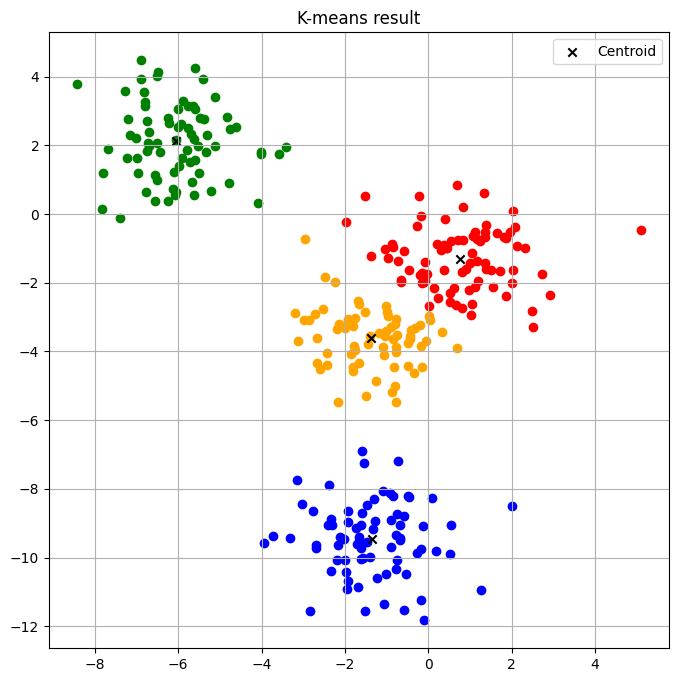

In [2]:
X, _ = make_blobs(n_samples=300, centers=4, random_state=2)
kmeans = KMeans(n_clusters=4, random_state=421)

kmeans.fit(X)
clusters = kmeans.labels

PlotUtils.plot("K-means result", X, clusters, kmeans.centroids)

# 2. K-medoids

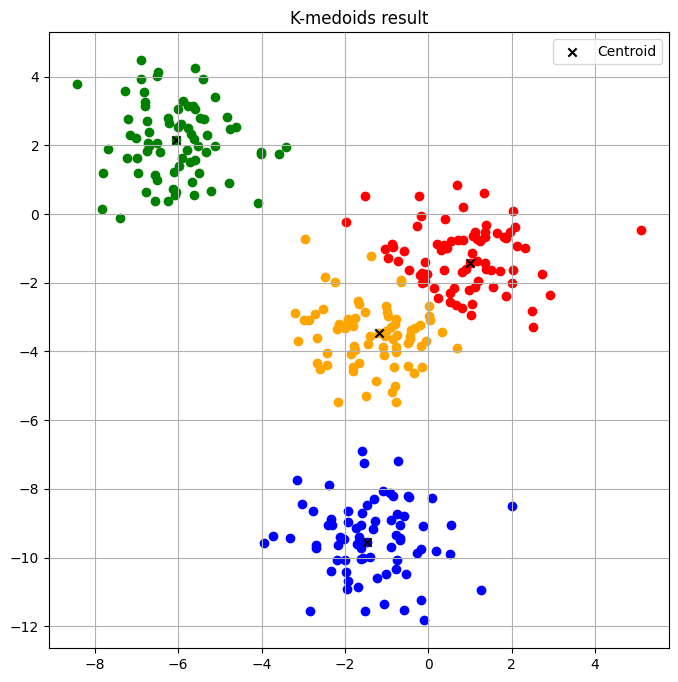

In [3]:
X, _ = make_blobs(n_samples=300, centers=4, random_state=2)
kmedoids = KMedoids(n_clusters=4, random_state=421)

kmedoids.fit(X)
clusters = kmedoids.labels

PlotUtils.plot("K-medoids result", X, clusters, kmedoids.medoids)

# 3. DBSCAN

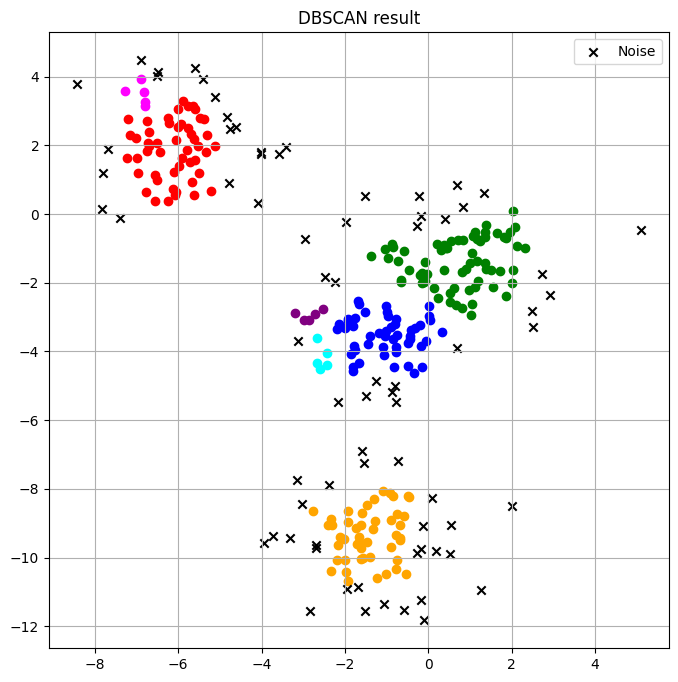

In [4]:
X, _ = make_blobs(n_samples=300, centers=4, random_state=2)
dbscan = DBSCAN()

dbscan.fit(X)
clusters = dbscan.labels

PlotUtils.plot_dbscan("DBSCAN result", X, clusters)

# 4. Agglomerative clustering

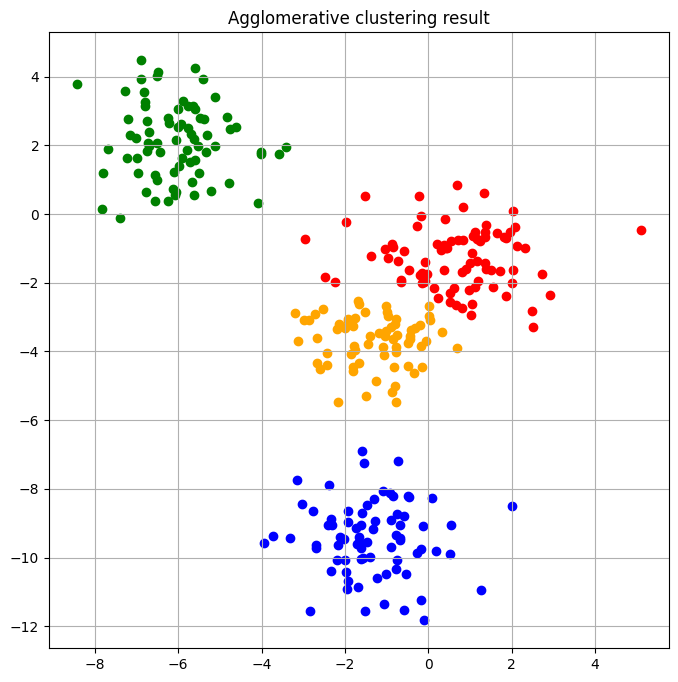

In [5]:
X, _ = make_blobs(n_samples=300, centers=4, random_state=2)
agg_clustering = AgglomerativeClustering(n_clusters=4)

agg_clustering.fit(X)
clusters = agg_clustering.labels

PlotUtils.plot("Agglomerative clustering result", X, clusters)

# Testing clustering on clusters of different forms

In [2]:
def generate_datasets():
    datasets = []

    X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
    datasets.append(StandardScaler().fit_transform(X))

    X, _ = make_moons(n_samples=300, noise=0.05)
    datasets.append(StandardScaler().fit_transform(X))

    X, _ = make_blobs(n_samples=300, centers=2, random_state=8)
    datasets.append(StandardScaler().fit_transform(X))

    X, _ = make_blobs(n_samples=300, centers=2, random_state=170)
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    X_aniso = np.dot(X, transformation)
    datasets.append(StandardScaler().fit_transform(X_aniso))

    X, _ = make_blobs(n_samples=300,
                      centers=2,
                      cluster_std=[1.0, 2.5],
                      random_state=170)
    datasets.append(StandardScaler().fit_transform(X))

    left_block = np.random.rand(300, 2) * [0.5, 1.0]  # X in [0, 0.5]
    right_block = np.random.rand(300, 2) * [0.5, 1.0] + [0.5, 0.0]  # X in [0.5, 1.0]
    X = np.vstack([left_block, right_block])
    datasets.append(StandardScaler().fit_transform(X))

    return datasets

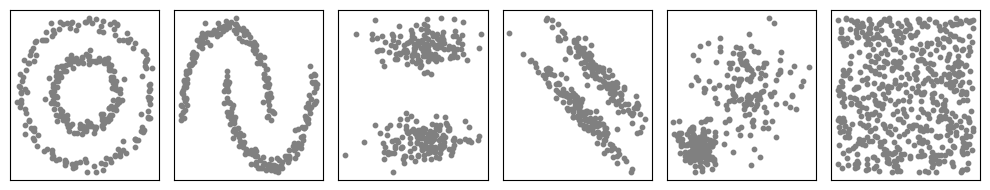

In [9]:
datasets = generate_datasets()

fig, axes = plt.subplots(1, len(datasets), figsize=(10, 2))
axes = axes.flatten()

for i, X in enumerate(datasets):
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], color='gray', s=10)
    ax.set_xticks([])
    ax.set_yticks([])

# Turn off unused subplot
if len(datasets) < len(axes):
    for j in range(len(datasets), len(axes)):
        axes[j].axis('off')

plt.tight_layout()
plt.show()